## 선형 회귀

### 정규 방정식을 사용한 선형 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

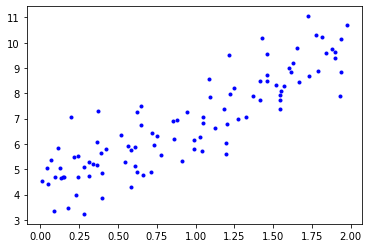

In [ ]:
plt.plot(X, y, 'b.')

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]

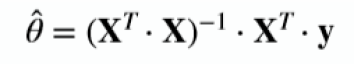

#### 정규방정식공식을 np.linalg 함수들을 이용하여 해를 구함

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b


array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

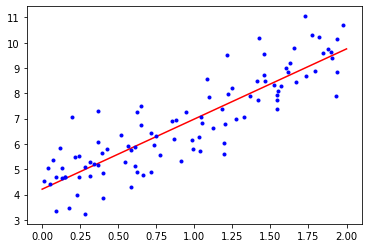

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.show()

#### 사이킷런 제공 LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.score(__, __) # R2 값

### 경사 하강법을 사용한 선형 회귀

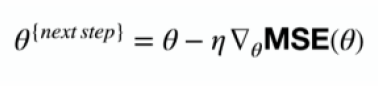

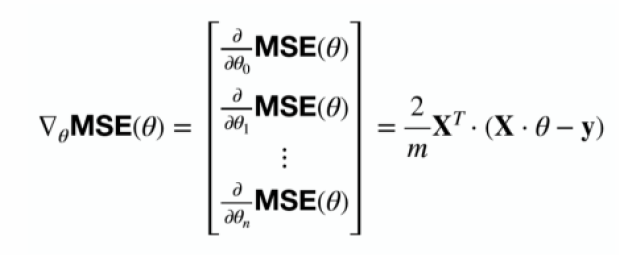

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

(100, 2)

In [6]:
m = 100
theta = np.random.randn(2, 1)
eta = 0.1
n_iterations = 1000
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [8]:
theta

array([[4.21509616],
       [2.77011339]])

#### 확률적 경사 하강법

In [17]:
np.random.seed(42)

In [18]:
m = 100
theta = np.random.randn(2, 1)
eta = 0.1
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index +1] # 한개의 샘플
    yi = y[random_index: random_index +1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i) # step 수가 증가함에 따라 eta가 작아지게 함
    theta = theta - eta * gradients

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### 다항회귀

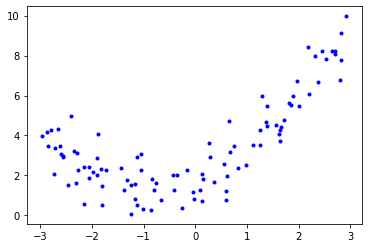

In [30]:
# 비선형성을 갖는 데이터를 표현하기 위해 0.5X**2 + X + 2 형태의 데이터를 임으로 만듬
# 모델 훈련후 0.5, 1, 2(0.5X**2 + X + 2) 와 같은 모델 파라미터를 근사하는지 확인할 목적
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')

In [35]:
# 기본 선형회귀 모델로 모델링을 했을때 : 기울기 0.8 절편 3.5 정도의 1차 방정식으로 데이터를 표현
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [36]:
# 특성의 제곱항을 추가하기 위해 PolynomialFeatures 변화기 사용
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # PolynomialFeatures는 변환기의 한종류

X_poly = poly_features.fit_transform(X) # fit과 transform을 동시에 수행, 변환된 데이터가 X_poly로 반환

In [52]:
X[0], X_poly[0] # 원본 특성에 제곱된 특성 하나 더 추가된 것을 확인할 수 있음

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [53]:
poly_features.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x0^2']

In [54]:
# 다항 회귀 기법(즉, 변환된 데이터로 훈련)을 이용하여 모델링
# 모델 훈련후 0.5, 1, 2 (0.5X**2 + X + 2) 와 같은 모델 파라미터를 근사하는지 확인
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

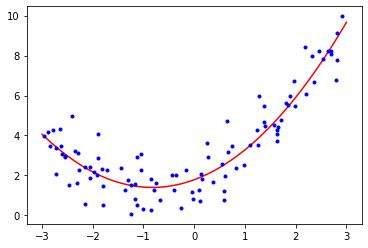

In [55]:
# 학습된 모델로 새로운 데이터(-3에서 3까지의 100개의 데이터)에 대한 예측선 그리기
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.plot(X_new, y_new, "r-")
plt.plot(X, y, 'b.')
plt.show()

### 릿지 회귀 - L2 규제

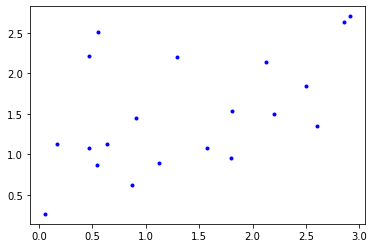

In [63]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5*X + 1+ np.random.randn(m,1)/1.5
plt.plot(X, y, "b." )


In [69]:
# 선형모델 (규제없이)
lin_reg = LinearRegression()
lin_reg.fit(X, y.ravel())
lin_reg.predict([[1.5]])


array([1.55355842])

In [70]:
lin_reg.intercept_, lin_reg.coef_

(0.9757366686668743, array([0.3852145]))

In [72]:
# 릿지 모델 (L2 규제가 들어간 모델) - 해석적으로 해를 구함
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X, y.ravel())

ridge_reg.predict([[1.5]])

array([1.55071465])

In [73]:
ridge_reg.intercept_, ridge_reg.coef_

(1.0065091134341868, array([0.36280369]))

In [78]:
# 릿지모델 (L2 규제가 들어간 모델) - 경사하강법으로 해를 구함

sgd_reg = SGDRegressor(penalty='l2', random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [79]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.53947472]), array([0.62043411]))

In [ ]:
## 라소회귀 (L1 규제가 들어간 모델) - 해석적으로 해를 구함

In [82]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y.ravel())

lasso_reg.predict([[1.5]])

array([1.53788174])

In [83]:
lasso_reg.intercept_, lasso_reg.coef_

(1.145373559244166, array([0.26167212]))

In [ ]:
## 라소회귀 (L1 규제가 들어간 모델) - 경사하강법으로 해를 구함

In [84]:
sgd_reg = SGDRegressor(penalty="l1", random_state=41)
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([1.46683196])

In [85]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.53974797]), array([0.61805599]))